In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import exp
import os, copy

# FORMATANDO BLOWING
- Definindo os critérios de "inicio" e "fim" de sopro manualmente, isso foi feito individualmente em cada arquivo usando o critério de derivada para isso, mas a ideia é o modelo servir de modo geral

In [75]:
def isBlowing(start, end):
    global is_blowing

    if start:
        is_blowing = True

    if end:
        is_blowing = False

    return is_blowing


fileNum  = 1
filePath = f'test_{fileNum}.csv'
df = pd.read_csv(filePath)
df.head()

,time,pressure,mean,ratio,start_blow,stop_blow,blowing
0,2.1,26.67323,27.01860,-0.34537,False,False,False
1,2.2,26.60998,27.07852,-0.46854,False,False,False
2,2.3,26.55360,27.10403,-0.55043,False,False,False
3,2.4,26.50348,27.10224,-0.59876,False,False,False
4,2.5,26.45982,27.07937,-0.61955,False,True,False


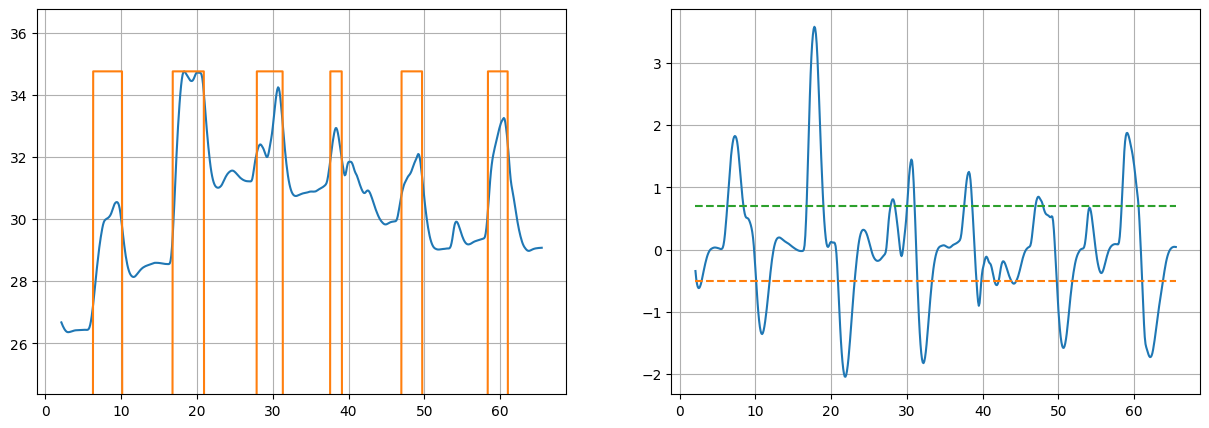

In [79]:
df = df.loc[df.time > 2.0]
is_blowing   = False
lower, upper = (-.5, .7)

df['ratio'] = df['pressure'] - df['mean']
df['start_blow'] = df.ratio > upper
df['stop_blow']  = df.ratio < lower
df['blowing']    = df.apply(lambda row: isBlowing(row.start_blow, row.stop_blow), axis=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.pressure)
plt.plot(df.time, df.blowing*df.pressure.max())
plt.ylim(df.pressure.min()-2, df.pressure.max()+2), plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.time, df.ratio)
plt.plot(df.time, lower * np.ones_like(df.time), '--')
plt.plot(df.time, upper * np.ones_like(df.time), '--')
plt.grid()
df.to_csv(filePath, index=None)

# VERIFICANDO TABELAS

In [61]:
files = [file for file in os.listdir(None) if '.csv' in file]
print(files)

['test_1.csv', 'test_2.csv']


In [62]:
def getTables(files):
    tables = {}

    for filePath in files:
        tables[filePath] = pd.read_csv(filePath)

    return tables


tables = getTables(files)
tables[files[0]]

,time,pressure,mean,ratio,start_blow,stop_blow,blowing
0,2.1,26.67323,27.01860,-0.34537,False,False,False
1,2.2,26.60998,27.07852,-0.46854,False,False,False
2,2.3,26.55360,27.10403,-0.55043,False,False,False
3,2.4,26.50348,27.10224,-0.59876,False,False,False
4,2.5,26.45982,27.07937,-0.61955,False,True,False
...,...,...,...,...,...,...,...
630,65.1,29.07035,29.03164,0.03871,False,False,False
631,65.2,29.07266,29.03009,0.04257,False,False,False
632,65.3,29.07453,29.03048,0.04405,False,False,False
633,65.4,29.07589,29.03247,0.04342,False,False,False


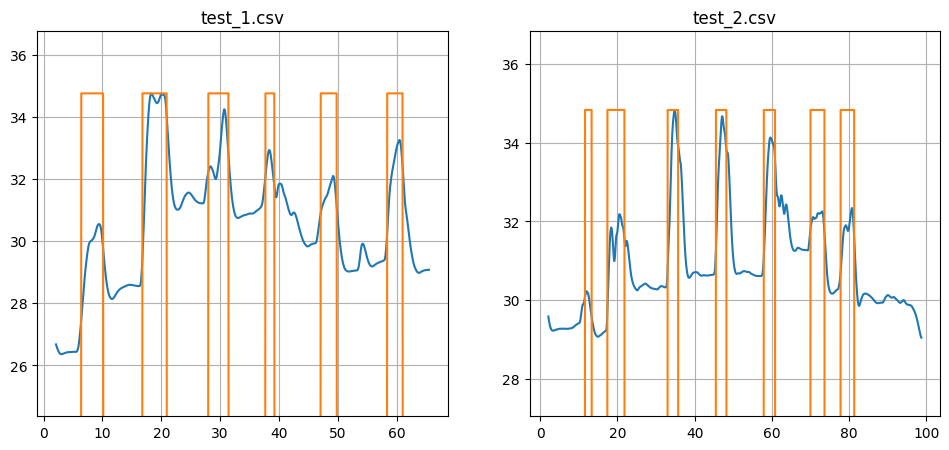

In [ ]:
def plotTables(tables, limit=None):
    numRows = len(tables.values()) // 3 + 1
    plt.figure(figsize=(18, 5*numRows))

    for i, name in enumerate(tables.keys()):
        table = tables[name]
        plt.subplot(numRows, 3, i+1)
        plt.plot(table.time, table.pressure)
        plt.plot(table.time, table.blowing*table.pressure.max())
        plt.ylim(table.pressure.min()-2, table.pressure.max()+2)
        plt.grid(), plt.title(name)

        if limit is not None and i == limit - 1:
            break
    
    plt.show()


plotTables(tables, limit=9)

# JUNTANDO TABELAS
- Todos os arquivos agora serão juntados em 1 só, para isso, o tempo terá que iniciar (ser somado) partir do último valor do arquivo anterior (para ficar contínuo)

size: 1602


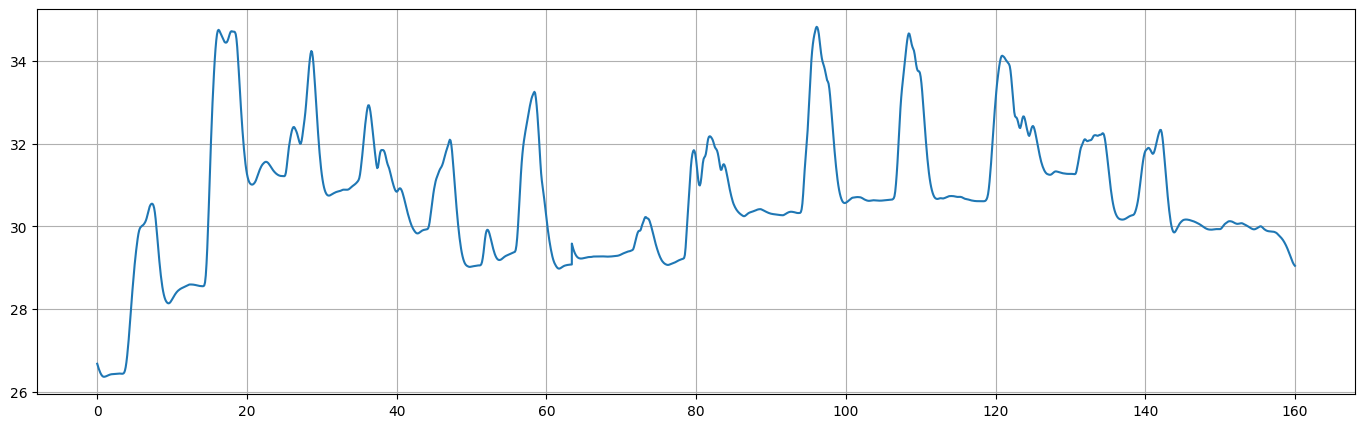

In [64]:
def joinTables(tables):
    df = pd.DataFrame()

    for table in tables.values():
        table['time'] = table.time - table.time.values[0]
        t0 = 0 if len(df) == 0 else df.time.values[-1]

        table['time'] = table.time + t0
        df = pd.concat([df, table])

    return df


df = joinTables(tables)
print('size:', len(df))
plt.figure(figsize=(17, 5))
plt.plot(df.time, df.pressure)
plt.grid()

In [65]:
def getChance(percentage=30):
    return np.random.rand() < (percentage / 100)

getChance(60)

True

In [66]:
tables[f'test_{(1 % 5) + 1}.csv']

,time,pressure,mean,ratio,start_blow,stop_blow,blowing
0,63.4,29.58332,29.96634,-0.38302,False,False,False
1,63.5,29.51246,30.03109,-0.51863,False,True,False
2,63.6,29.45041,30.05771,-0.60730,False,True,False
3,63.7,29.39732,30.05425,-0.65693,False,True,False
4,63.8,29.35271,30.02778,-0.67507,False,True,False
...,...,...,...,...,...,...,...
962,159.6,29.17463,29.55205,-0.37742,False,False,False
963,159.7,29.13093,29.51802,-0.38709,False,False,False
964,159.8,29.09455,29.48313,-0.38858,False,False,False
965,159.9,29.06598,29.44778,-0.38180,False,False,False


In [67]:
for i in range(300):
    tableIndex = (i % len(tables)) + 1
    oldTableName = f'test_{tableIndex}.csv'
    newTableName = f'test_{len(tables)+1}.csv'
    
    oldTable = tables[oldTableName]
    tables[newTableName] = oldTable.copy()

len(tables)

302

test_1.csv (modo 1): m = 1.00 | s = 0.05
test_2.csv (modo 0): m = 1.09 | s = -2.14
test_3.csv (modo 0): m = 0.82 | s = -2.84
test_4.csv (modo 0): m = 0.99 | s = -2.92
test_5.csv (modo 1): m = 1.03 | s = 0.73
test_6.csv (modo 2): m = 1.15 | s = 1.13
test_7.csv (modo 0): m = 0.88 | s = -1.61
test_8.csv (modo 2): m = 1.10 | s = 0.41
test_9.csv (modo 1): m = 0.99 | s = -0.70
test_10.csv (modo 2): m = 1.08 | s = 2.30
test_11.csv (modo 1): m = 1.01 | s = -0.28
test_12.csv (modo 0): m = 1.05 | s = -2.88
test_13.csv (modo 1): m = 1.00 | s = 0.18
test_14.csv (modo 0): m = 1.08 | s = -1.86
test_15.csv (modo 1): m = 1.01 | s = -0.47
test_16.csv (modo 0): m = 1.08 | s = -2.29
test_17.csv (modo 1): m = 0.95 | s = -0.07
test_18.csv (modo 0): m = 1.03 | s = -2.84
test_19.csv (modo 2): m = 0.80 | s = 2.37
test_20.csv (modo 2): m = 0.81 | s = 3.42
test_21.csv (modo 2): m = 0.91 | s = 2.98
test_22.csv (modo 2): m = 0.93 | s = 0.48
test_23.csv (modo 1): m = 0.97 | s = -0.47
test_24.csv (modo 2): m = 0.99

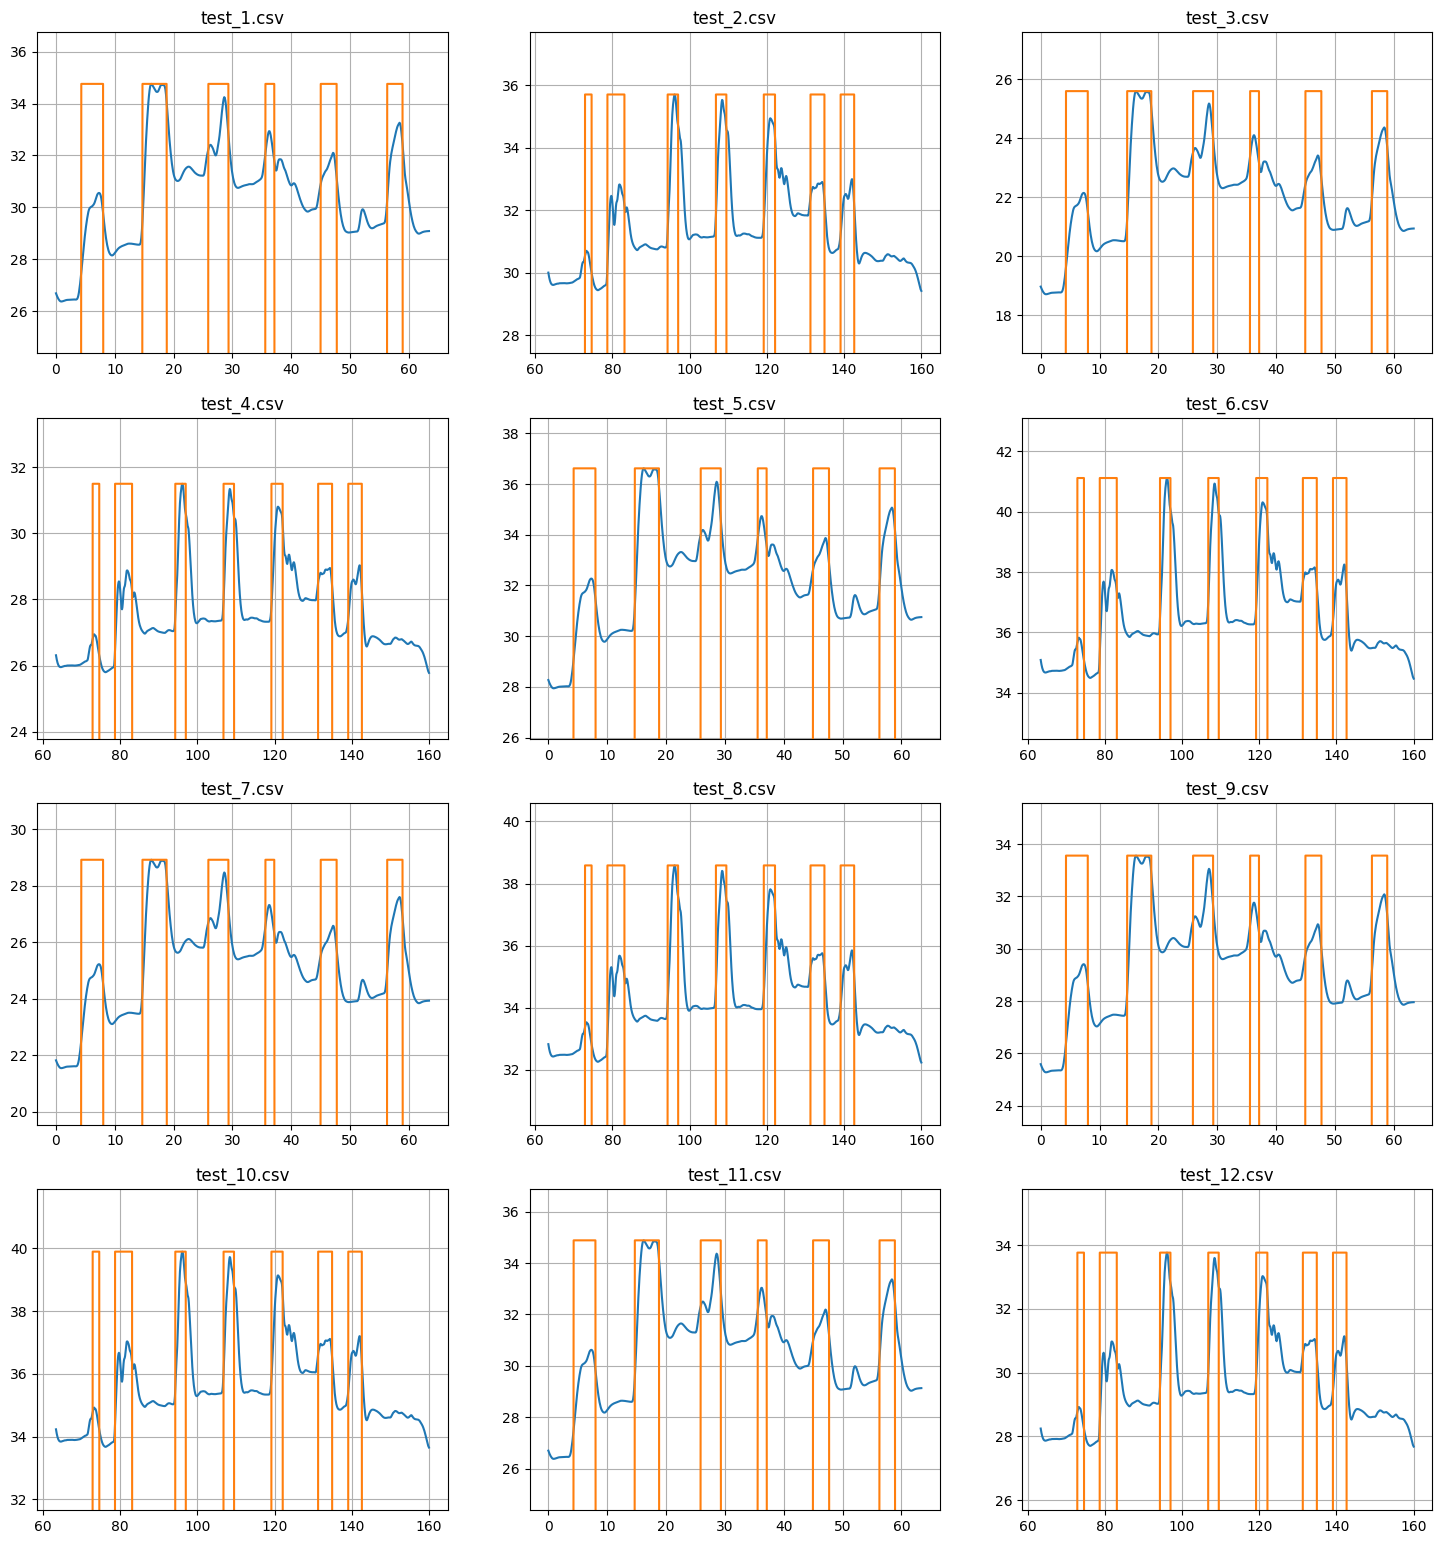

In [68]:
def normalizeTables(df):
    dataset = copy.deepcopy(df)

    for name, table in dataset.items():
        if getChance(30):
            mode = 0
            multiplyer = np.random.uniform(0.75, 1.15)
            somador = np.random.uniform(-35, -15) / 10
        elif getChance(40):
            mode = 1
            multiplyer = np.random.uniform(0.95, 1.05) 
            somador = np.random.uniform(-10, 10) / 10
        else:
            mode = 2
            multiplyer = np.random.uniform(0.75, 1.15)
            somador = np.random.uniform(15, 400) / 100
        
        print(f'{name} (modo {mode}): m = {multiplyer:.2f} | s = {somador:.2f}')
        table['pressure'] = (table['pressure'] * multiplyer) + somador
        table['mean']     = (table['mean'] * multiplyer) + somador

    return dataset


normalized = normalizeTables(tables)
plotTables(normalized, limit=12)

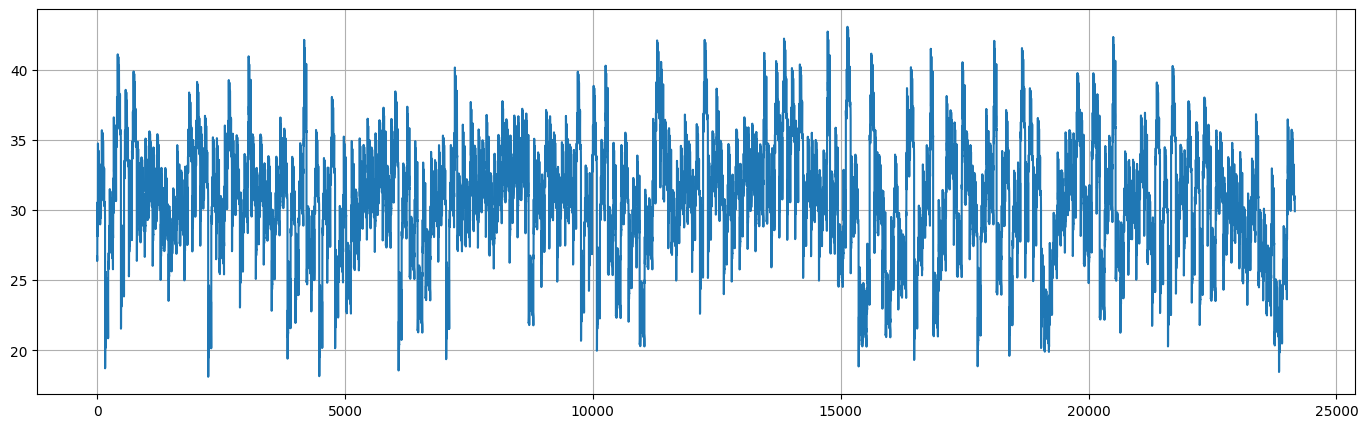

In [69]:
df = joinTables(normalized)
df.to_csv('../DataBase.csv', index=None)
plt.figure(figsize=(17, 5))
plt.plot(df.time, df.pressure)
plt.grid()

# OBTENDO A VARIAVEL DESEJADA
Os valores de início e fim de sopro são os pontos discretizados ao longo do gráfico, o objetivo do modelo é encontrar o momento que iniciou o sopro, e o momento que não há mais sopro

test_1.csv


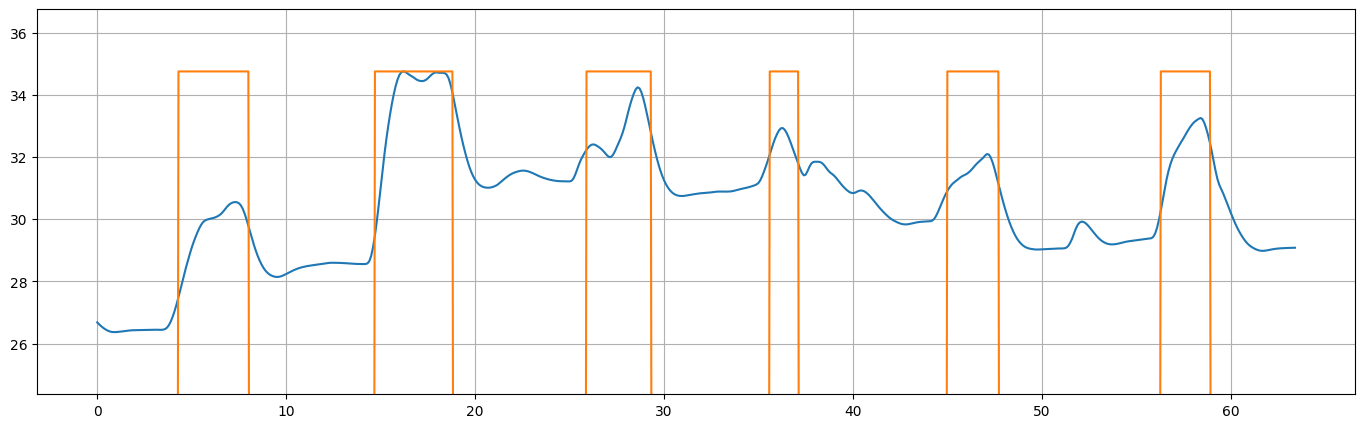

test_2.csv


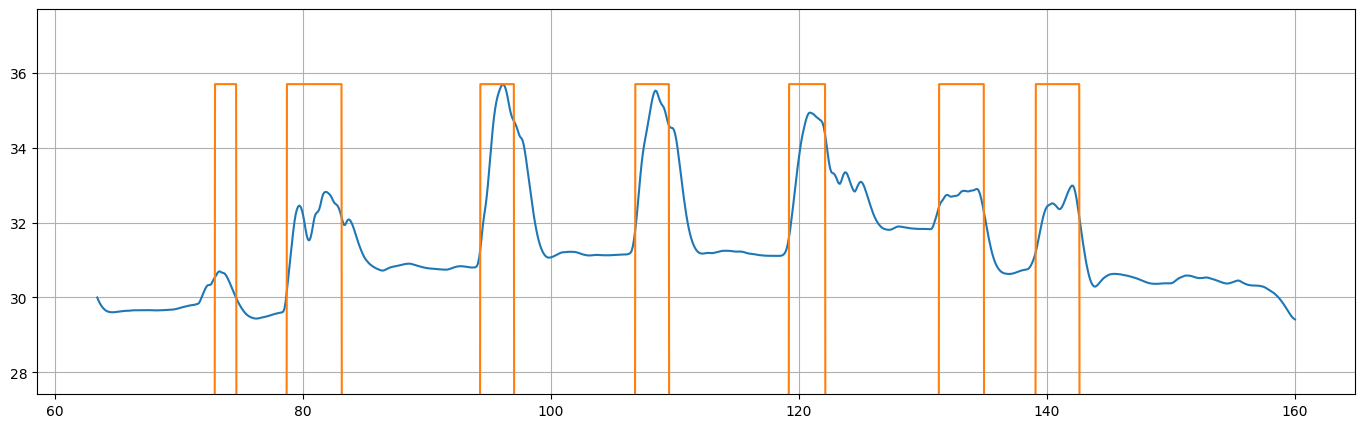

In [70]:
for i, (name, df) in enumerate(normalized.items()):
    plt.figure(figsize=(17, 5))
    plt.plot(df.time, df.pressure)
    plt.plot(df.time, df.blowing * df.pressure.max())
    plt.ylim(df.pressure.min()-2, df.pressure.max()+2)
    print(name), plt.grid(), plt.show()

    if i == len(files) - 1:
        break